<a href="https://colab.research.google.com/github/ajit04022000/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Data Exploration

In [60]:
# importing all the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
# defining the path from google drive and give the data set a name to access
df = pd.read_csv("/content/drive/MyDrive/ALMABATTER/Hotel Booking Analysis - Ajit Kumar Patel/Hotel Bookings.csv")

In [240]:
# to get the 1st 5 row (default vale) and all columns of our dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,addational_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [96]:
# using a loop to print all the columns name
# it have also a inbult funtion: 
# df.columns
for i in df :
  print (i)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [141]:
# to find out the types of hottel
types_of_hotel = df['hotel'].unique()
print(f'the types of hotels are : {types_of_hotel}')

the types of hotels are : ['Resort Hotel' 'City Hotel']


In [145]:
# to know how many resort hotel and city hotels are present
resort_hot=[i for i in df["hotel"] if i=="Resort Hotel"]
print(f'the no of resort_hotels are : {len(resort_hot)}')

city_hot=[i for i in df["hotel"] if i!="Resort Hotel"]
print(f'the no of city_hotels are : {len(city_hot)}')

total_hotels = (len(resort_hot))+(len(city_hot))
print(f'the no of total hotel present : {total_hotels}')

the no of resort_hotels are : 40060
the no of city_hotels are : 79330
the no of total hotel present : 119390


In [241]:
# getting the all information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [243]:
# casual check
# Here we can see that the arrival_date_year ,arrival_date_month , arival_date_day_of_year
# are separated and its make the data set big so we can add them to a new column arrive_date to 
df['arrival_date'] = df['arrival_date_month'].astype(str) + " " + df['arrival_date_day_of_month'].astype(str)+ " "+ df['arrival_date_year'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# now lets do clean the data

In [242]:
# now we are trying to find the missing value 
#null = df.isna().sum().sort_values()/len(df)
null = df.isna().sum().sort_values(ascending=False)
null

company                           112593
agent                              16340
country                              488
addational_guests                      4
children                               4
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
previous_bookings_not_canceled         0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
reserved_room_type                     0
hotel                                  0
previous_cancellations                 0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults          

In [245]:
# anathor approach to this upper task (to find out null value)
for i in df :
  if df[i].isna().sum()!=0:
    print(i,"is having ",df[i].isna().sum(),"null values")

children is having  4 null values
country is having  488 null values
agent is having  16340 null values
company is having  112593 null values
addational_guests is having  4 null values


In [246]:
# now we dropping the unnecessar and the most nulabel column from our data set 
# hear company is drop because the null valu is maximum and 
# arrival_date_week_number is drop because this is not that much important to our dataset
df.drop(["company","arrival_date_week_number"] , inplace = True , axis = 1)

In [48]:
# Now its the time to fill the missing value as for the as theri needed
# country = .mode()
# children = .median()
# agent = .median()
df['country'].fillna(df['country'].mode()[0],inplace = True)
df['children'].fillna(df['children'].median(),inplace = True)
df['agent'].fillna(df['agent'].median(),inplace = True)

In [51]:
# checking the missing vallu is fell or not
df.isna().sum().sort_values(ascending = False)/len(df)

hotel                             0.0
previous_cancellations            0.0
reservation_status_date           0.0
reservation_status                0.0
total_of_special_requests         0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
assigned_room_type                0.0
reserved_room_type                0.0
previous_bookings_not_canceled    0.0
is_repeated_guest                 0.0
is_canceled                       0.0
distribution_channel              0.0
market_segment                    0.0
country                           0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_week_nights              0.0
stays_in_weekend_nights           0.0
arrival_date

In [235]:
# now we merge all the addational guest like: adults and children to know how many addational gest are present
df['addational_guests'] = df['adults'] + df['children'] +df['babies']

In [236]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,addational_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [238]:
df.shape

(119390, 33)

In [134]:
from datetime import datetime
%matplotlib inline


In [ ]:
lead_time_of_hotel = df['lead_time'].value_counts().sort_index(inplace= True)


In [ ]:
print(lead_time_of_hotel)


Text(0.5, 0, 'date')

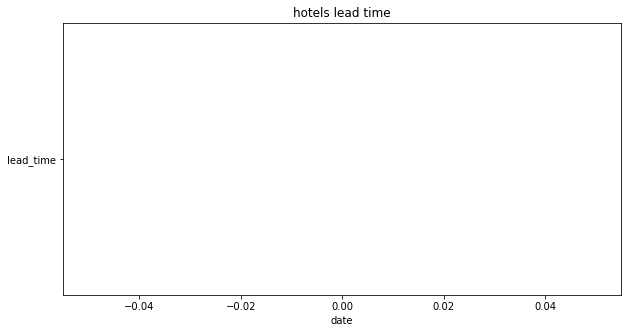

In [124]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot('lead_time')
plt.title('hotels lead time')
plt.xlabel("hotel tpye")
plt.xlabel("date")


Text(0, 0.5, 'Count')

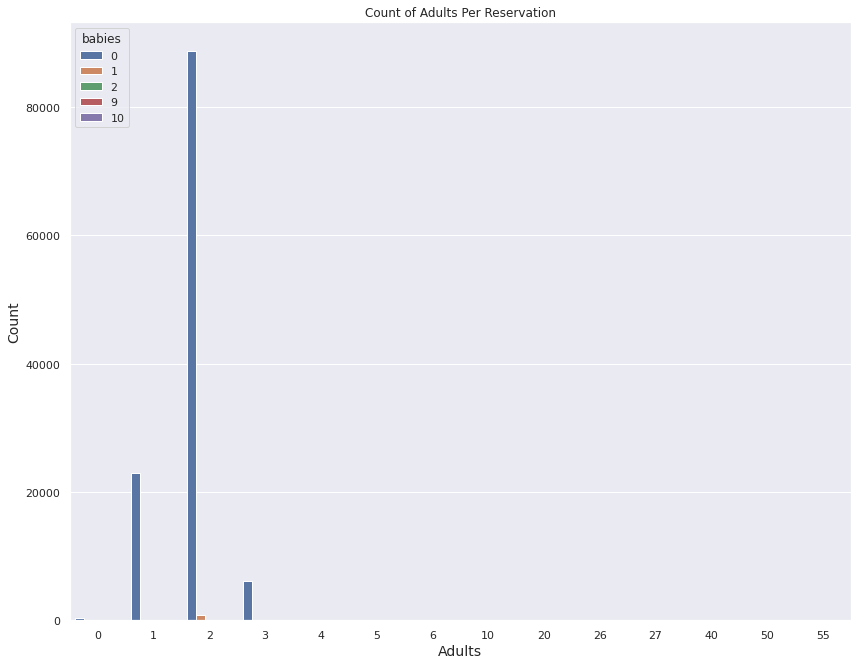

In [234]:
sns.set(rc={'figure.figsize':(14,11)})
g = sns.countplot(data=df,x="adults",hue = "babies")
g.set(title="Count of Adults Per Reservation")
g.set_xlabel("Adults", fontsize = 14)
g.set_ylabel("Count", fontsize = 14)

In [171]:
df["country"].value_counts().unique()

array([48590, 12129, 10415,  8568,  7287,  3766,  3375,  2342,  2224,
        2104,  2097,  1730,  1279,  1263,  1024,   999,   919,   669,
         632,   607,   500,   447,   435,   426,   362,   287,   259,
         248,   230,   214,   197,   171,   152,   133,   128,   103,
         101,   100,    85,    83,    81,    80,    75,    74,    71,
          68,    67,    65,    59,    57,    55,    51,    48,    40,
          39,    35,    34,    32,    31,    29,    28,    27,    26,
          24,    22,    21,    19,    18,    17,    16,    15,    14,
          13,    12,    11,    10,     9,     8,     7,     6,     5,
           4,     3,     2,     1])

In [179]:
for i in df:
    print(i,df[i].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 333
company 352
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


In [202]:
count_list=[i for i in df["country"].value_counts()]
len(count_list)

177

In [203]:
len(count_list)

177

In [204]:
Name_list=[i for i in df["country"].unique()]
len(Name_list)

178

In [207]:
dict1={i:j for i,j in zip (Name_list,count_list,)}

In [247]:
print(dict1)

{'PRT': 48590, 'GBR': 12129, 'USA': 10415, 'ESP': 8568, 'IRL': 7287, 'FRA': 3766, nan: 3375, 'ROU': 2342, 'NOR': 2224, 'OMN': 2104, 'ARG': 2097, 'POL': 1730, 'DEU': 1279, 'BEL': 1263, 'CHE': 1024, 'CN': 999, 'GRC': 919, 'ITA': 669, 'NLD': 632, 'DNK': 607, 'RUS': 500, 'SWE': 447, 'AUS': 435, 'EST': 426, 'CZE': 362, 'BRA': 287, 'FIN': 259, 'MOZ': 248, 'BWA': 230, 'LUX': 214, 'SVN': 197, 'ALB': 171, 'IND': 152, 'CHN': 133, 'MEX': 128, 'MAR': 103, 'UKR': 101, 'SMR': 100, 'LVA': 85, 'PRI': 83, 'SRB': 83, 'CHL': 81, 'AUT': 80, 'BLR': 75, 'LTU': 74, 'TUR': 71, 'ZAF': 68, 'AGO': 67, 'ISR': 65, 'CYM': 65, 'ZMB': 59, 'CPV': 57, 'ZWE': 57, 'DZA': 55, 'KOR': 51, 'CRI': 51, 'HUN': 51, 'ARE': 48, 'TUN': 40, 'JAM': 39, 'HRV': 39, 'HKG': 35, 'IRN': 34, 'GEO': 32, 'AND': 32, 'GIB': 31, 'URY': 29, 'JEY': 29, 'CAF': 28, 'CYP': 27, 'COL': 26, 'GGY': 26, 'KWT': 24, 'NGA': 22, 'MDV': 21, 'VEN': 19, 'SVK': 19, 'FJI': 18, 'KAZ': 18, 'PAK': 18, 'IDN': 17, 'LBN': 16, 'PHL': 16, 'SEN': 15, 'SYC': 14, 'AZE': 14, 

In [185]:
df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [186]:
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


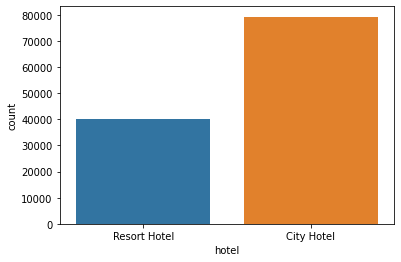

In [155]:
sns.countplot(df["hotel"])

In [215]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


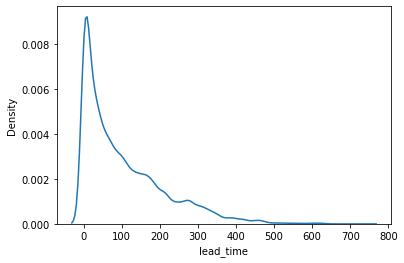

In [217]:
sns.distplot(df["lead_time"],hist=False)

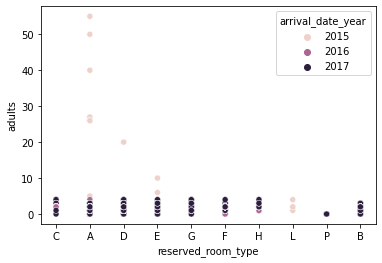

In [224]:
sns.scatterplot(x=df["reserved_room_type"],y=df["adults"],hue=df[""])

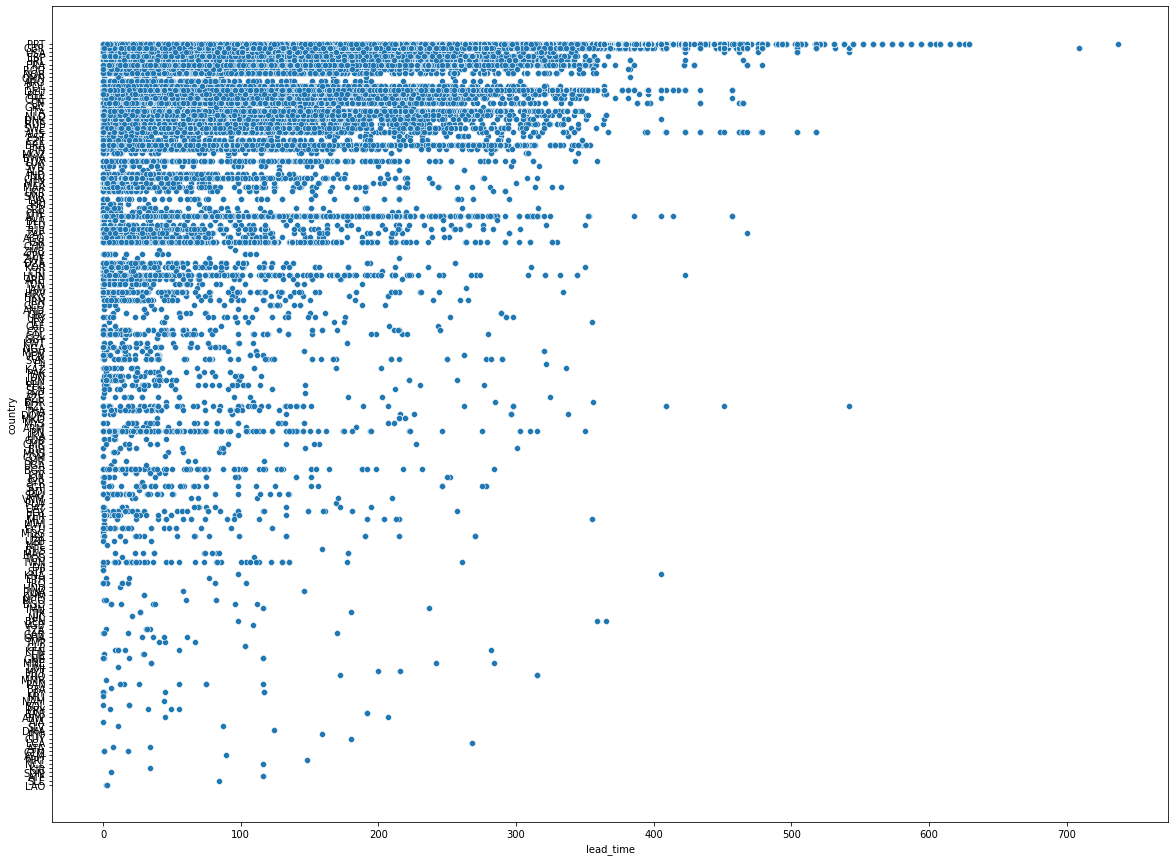

In [165]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=df["lead_time"],y=df["country"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

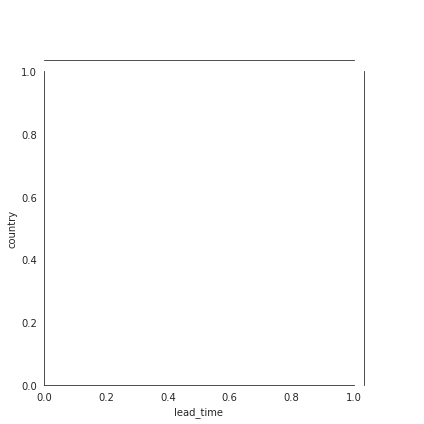

In [164]:
with sns.axes_style('white'):
  sns.jointplot('lead_time','country',df,kind= 'hex')